## The introduction of Jacobi Method:

In this PSC you are going to develop a solver for the system

$$Ax = b$$

that is, given a $n \times n$ matrix A and a RHS vector $b$, of size $n$. you need to compute the solution vector $x$ (which is also of size $n$).

From class you will know that computing the inverse of $A$ and multiplying against $b$ gives you this solution. That is,

$$ x = A^{-1}b$$

This is called a direct method, but sometimes the inverse of $A$ is very difficult to find, sometimes it is impossible to compute, so we have developed alternative routes to solving the system without creating the inverse itself.

Iterative methods are typically used to solve these systems. In these we start with an approximation to $x$, and perform some operation to generate a new vector $x^{new}$ that is a bit closer to the true solution. You repeat the operation with the new vector and it gives you another vector that is again a bit closer to the true solution.

When you do this enough times, the approximation will converge to the true solution, when you are close enough you simply stop. 

There is a massive class of iterative solvers out there. We will develop the simplest one called the Jacobi method.The recipe is as follows:

For the system of size $n \times n$

$$Ax = b$$

start with some approximation $x$. The Jacobi iteration creates a new vector $x^{1}$ by:


loop over each element of $x_i$ for $i = \{ 1,2,3, \ldots n \}$, and compute the new value by:

$$ x_i^{new} = \frac{(b_i - \sum_{j=1, j \ne i}^{n} A_{i,j} x_j )}{A_{i,i}} $$




You need to set a tolerance, TOL (can be a very small value 0.1).

You keep subtituting the  𝑥𝑗  from the previous step to calculate the  𝑥𝑛𝑒𝑤𝑖  in the new step. Loop it until you reach the stopping criterion.

|𝑥𝑘−1𝑖−𝑥𝑘𝑖|<𝑇𝑂𝐿 
which means the values  𝑥𝑖  is not changing anymore.

Watch this video if want to understand it better: https://www.youtube.com/watch?v=UA7bzwCwHMI

# Implmentation of the Jacobi method

You are going to implement this. but you need to do this in small stages and check the code is correct and bug free.

To give you a start, this is how I would develop the code when given some matrix $A$ and vector $b$

1) create the loop that will run through each x[i] in the above recipe - make sure the loop is the correct size.

2) create the line of code to compute x[i] from the above equation - note this will involve another loop AND an if statement.

3) when happy the above is correct, create an outer loop to continuously generate new solutions from the previous vector.

Over to you, i will get you stated with the matrix and vector setup.

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# a 3x3 matrix A
A = np.matrix([[5,2,1],[2,4,1],[2,3,7]])
# b vector
b = np.array([2,3,1])

In [3]:
# exact solution
b1 = np.array([[2],[3],[1]])
actual = inv(A)*b1
print(actual)

[[ 0.15151515]
 [ 0.72727273]
 [-0.21212121]]


In [4]:
# put your code in here, follow the recipe above

# x vector to hold solution with initial values zero
x = np.zeros(3)
x = np.zeros(3)
x_to_list = []

iters = 10 # number of iterations
N = 0      # Current iter. Note. This N represents the iter step. It is different from the n in the equation.
while N < iters:
    for i in range(x.size): # iterating through x
        sum_a = 0 # initialising variable used to store the sum of the product Aij*xj
        for j in range(A.shape[0]): # iterating over the rows of A / same as A.shape[1]
            if i != j: # condition to ensure i is not equal to j
                sum_a += A[i,j]*x[j] 
        x[i] = (b[i] - sum_a)/A[i,i] # used to find xnew
        x_to_list.append((b[i] - sum_a)/A[i,i]) # appending the result to a list
    N += 1 # once the for loop above is completed, increases the value of n by 1, until n = iters then loop stops
    print(f'Iter({N}): {x}') # used to print 1) iteration number and 2) the values of x at the end of each iteration

Iter(1): [ 0.4         0.55       -0.20714286]
Iter(2): [ 0.22142857  0.69107143 -0.21658163]
Iter(3): [ 0.16688776  0.72070153 -0.21369716]
Iter(4): [ 0.15445882  0.72619488 -0.21250033]
Iter(5): [ 0.15202211  0.72711402 -0.21219804]
Iter(6): [ 0.151594    0.72725251 -0.21213508]
Iter(7): [ 0.15152601  0.72727076 -0.21212347]
Iter(8): [ 0.15151639  0.72727267 -0.21212154]
Iter(9): [ 0.15151524  0.72727277 -0.21212125]
Iter(10): [ 0.15151514  0.72727274 -0.21212122]


### A better solution

Consider both iteration number and the error tolerance

In [5]:

import numpy as np

# a 3x3 matrix A
A = np.matrix([[5,2,1],[2,4,1],[2,3,7]])
# b vector
b = np.array([2,3,1])
# x vector to hold solution with initial values zero
x = np.zeros(3)

# put your code in here, follow the recipe above
TOL=0.0001
x_m = np.zeros(x.size) 
x_n = np.zeros(x.size)
xerror = np.zeros(x.size)
iteration_number=20
k=0
while k<iteration_number:
    for i in range(x.size):
        sum_a=0
        for j in range(A.shape[0]):
            if i!=j:
                sum_a += A[i,j]*x[j]
            x[i]=(b[i]-sum_a)/A[i,i]
        x_n[i]=x[i]  
        xerror[i]=abs(x_m[i]-x_n[i])
        xerror_max=max(xerror[0],xerror[1],xerror[2])
    print(f'maximum x error is({xerror_max})')
    if xerror_max<TOL:
        print(f'Iter({k}): {x}')
        break
    else:
        for n in range(x_m.size):
            x_m[n]=x_n[n]
        k+=1
        print(f'Iter({k}): {x}')
if k>=iteration_number:
    print(f'Please increase iteration_number')

maximum x error is(0.55)
Iter(1): [ 0.4         0.55       -0.20714286]
maximum x error is(0.17857142857142858)
Iter(2): [ 0.22142857  0.69107143 -0.21658163]
maximum x error is(0.05454081632653063)
Iter(3): [ 0.16688776  0.72070153 -0.21369716]
maximum x error is(0.012428935860058277)
Iter(4): [ 0.15445882  0.72619488 -0.21250033]
maximum x error is(0.0024367060599750356)
Iter(5): [ 0.15202211  0.72711402 -0.21219804]
maximum x error is(0.0004281144947046178)
Iter(6): [ 0.151594    0.72725251 -0.21213508]
maximum x error is(6.79880572985736e-05)
Iter(6): [ 0.15152601  0.72727076 -0.21212347]


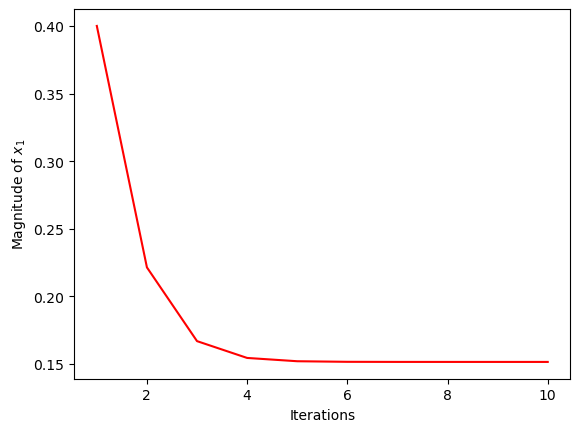

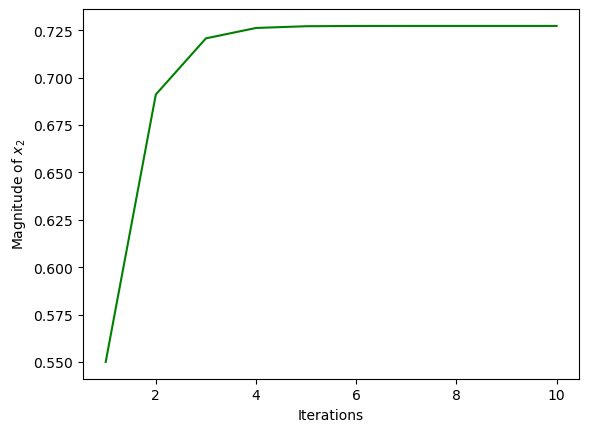

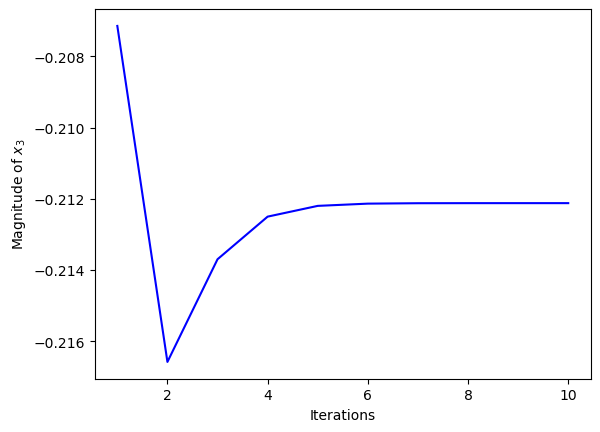

In [6]:
# Extra - Plotting the convergence graphs for each x

def divide_chunks(l, n): # converting list to a nested list - each sublist has 3 elements
    for i in range(0, len(l), n): 
        yield l[i:i + n]
n = 3
x_split = list(divide_chunks(x_to_list, n))
x1,x2,x3 = list(zip(*x_split)) # unzipping list into 3 lists
iterations = range(1,iters+1)

x_sublist = [x1,x2,x3]
colours=['r','g','b']
for i in range(len(x_sublist)):
    fig, ax = plt.subplots()
    ax.set(xlabel= r"Iterations", ylabel=r"Magnitude of $x_%s$" %(i+1))
    ax.plot(iterations,x_sublist[i],colours[i]) 